<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.623820,30.724864,56.053287,42.571750,-1854.432939,-1626.459219,40.467945,-1666.927164
1,0.0,1.0,54.906817,37.069651,73.693980,58.904931,2314.502225,2549.077604,381.317481,2167.760122
2,0.0,2.0,68.373450,25.428939,77.940633,93.569881,1307.831760,1583.144664,1194.129266,389.015398
3,0.0,3.0,95.271244,61.934277,95.897697,73.447122,3340.914933,3677.465272,-1514.564820,5192.030092
4,0.0,4.0,55.961012,69.510410,66.532998,35.875472,-6594.188328,-6356.308436,-1340.696860,-5015.611576
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,44.200091,72.309630,44.689406,53.115463,-2748.699338,-2524.384747,996.351782,-3520.736529
59996,999.0,56.0,88.702089,20.336177,34.889659,24.985824,-397.164917,-218.251169,772.806955,-991.058124
59997,999.0,57.0,33.596217,41.264699,33.007945,95.471826,-535.015355,-321.674668,-343.097415,21.422748
59998,999.0,58.0,35.689761,95.952809,50.570372,28.861898,-3852.562000,-3631.487159,1717.254281,-5348.741440


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.623820,30.724864,56.053287,42.571750,-1854.432939,-1626.459219,40.467945,-1666.927164
1,0.0,1.0,54.906817,37.069651,73.693980,58.904931,2314.502225,2549.077604,381.317481,2167.760122
2,0.0,2.0,68.373450,25.428939,77.940633,93.569881,1307.831760,1583.144664,1194.129266,389.015398
3,0.0,3.0,95.271244,61.934277,95.897697,73.447122,3340.914933,3677.465272,-1514.564820,5192.030092
4,0.0,4.0,55.961012,69.510410,66.532998,35.875472,-6594.188328,-6356.308436,-1340.696860,-5015.611576
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,44.200091,72.309630,44.689406,53.115463,-2748.699338,-2524.384747,996.351782,-3520.736529
59996,999.0,56.0,88.702089,20.336177,34.889659,24.985824,-397.164917,-218.251169,772.806955,-991.058124
59997,999.0,57.0,33.596217,41.264699,33.007945,95.471826,-535.015355,-321.674668,-343.097415,21.422748
59998,999.0,58.0,35.689761,95.952809,50.570372,28.861898,-3852.562000,-3631.487159,1717.254281,-5348.741440


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.623820  30.724864  56.053287  42.571750 -1854.432939   
      1.0    54.906817  37.069651  73.693980  58.904931  2314.502225   
      2.0    68.373450  25.428939  77.940633  93.569881  1307.831760   
      3.0    95.271244  61.934277  95.897697  73.447122  3340.914933   
      4.0    55.961012  69.510410  66.532998  35.875472 -6594.188328   
...                ...        ...        ...        ...          ...   
999.0 55.0   44.200091  72.309630  44.689406  53.115463 -2748.699338   
      56.0   88.702089  20.336177  34.889659  24.985824  -397.164917   
      57.0   33.596217  41.264699  33.007945  95.471826  -535.015355   
      58.0   35.689761  95.952809  50.570372  28.861898 -3852.562000   
      59.0   62.164793  94.263595  77.423411  92.700660  2442.258906   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0   -1626.459219    40.467945 -1666.927164  
      1.0    2549.077604   381.317481  2167.760122  
      2.0    1583.144664  1194.129266   389.015398  
      3.0    3677.465272 -1514.564820  5192.030092  
      4.0   -6356.308436 -1340.696860 -5015.611576  
...                  ...          ...          ...  
999.0 55.0  -2524.384747   996.351782 -3520.736529  
      56.0   -218.251169   772.806955  -991.058124  
      57.0   -321.674668  -343.097415    21.422748  
      58.0  -3631.487159  1717.254281 -5348.741440  
      59.0   2778.811364   933.055723  1845.755641  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.623820  30.724864  56.053287  42.571750 -1854.432939   
      1.0    54.906817  37.069651  73.693980  58.904931  2314.502225   
      2.0    68.373450  25.428939  77.940633  93.569881  1307.831760   
      3.0    95.271244  61.934277  95.897697  73.447122  3340.914933   
      4.0    55.961012  69.510410  66.532998  35.875472 -6594.188328   
...                ...        ...        ...        ...          ...   
999.0 55.0   44.200091  72.309630  44.689406  53.115463 -2748.699338   
      56.0   88.702089  20.336177  34.889659  24.985824  -397.164917   
      57.0   33.596217  41.264699  33.007945  95.471826  -535.015355   
      58.0   35.689761  95.952809  50.570372  28.861898 -3852.562000   
      59.0   62.164793  94.263595  77.423411  92.700660  2442.258906   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0   -1626.459219    40.467945 -1666.927164  
      1.0    2549.077604   381.317481  2167.760122  
      2.0    1583.144664  1194.129266   389.015398  
      3.0    3677.465272 -1514.564820  5192.030092  
      4.0   -6356.308436 -1340.696860 -5015.611576  
...                  ...          ...          ...  
999.0 55.0  -2524.384747   996.351782 -3520.736529  
      56.0   -218.251169   772.806955  -991.058124  
      57.0   -321.674668  -343.097415    21.422748  
      58.0  -3631.487159  1717.254281 -5348.741440  
      59.0   2778.811364   933.055723  1845.755641  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.623820,30.724864,56.053287,42.571750,-1854.432939,-1626.459219,40.467945,-1666.927164
1,0.0,1.0,54.906817,37.069651,73.693980,58.904931,2314.502225,2549.077604,381.317481,2167.760122
2,0.0,2.0,68.373450,25.428939,77.940633,93.569881,1307.831760,1583.144664,1194.129266,389.015398
3,0.0,3.0,95.271244,61.934277,95.897697,73.447122,3340.914933,3677.465272,-1514.564820,5192.030092
4,0.0,4.0,55.961012,69.510410,66.532998,35.875472,-6594.188328,-6356.308436,-1340.696860,-5015.611576
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,44.200091,72.309630,44.689406,53.115463,-2748.699338,-2524.384747,996.351782,-3520.736529
59996,999.0,56.0,88.702089,20.336177,34.889659,24.985824,-397.164917,-218.251169,772.806955,-991.058124
59997,999.0,57.0,33.596217,41.264699,33.007945,95.471826,-535.015355,-321.674668,-343.097415,21.422748
59998,999.0,58.0,35.689761,95.952809,50.570372,28.861898,-3852.562000,-3631.487159,1717.254281,-5348.741440


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.623820  30.724864  56.053287  42.571750 -1854.432939   
      1.0    54.906817  37.069651  73.693980  58.904931  2314.502225   
      2.0    68.373450  25.428939  77.940633  93.569881  1307.831760   
      3.0    95.271244  61.934277  95.897697  73.447122  3340.914933   
      4.0    55.961012  69.510410  66.532998  35.875472 -6594.188328   
...                ...        ...        ...        ...          ...   
999.0 55.0   44.200091  72.309630  44.689406  53.115463 -2748.699338   
      56.0   88.702089  20.336177  34.889659  24.985824  -397.164917   
      57.0   33.596217  41.264699  33.007945  95.471826  -535.015355   
      58.0   35.689761  95.952809  50.570372  28.861898 -3852.562000   
      59.0   62.164793  94.263595  77.423411  92.700660  2442.258906   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0   -1626.459219    40.467945 -1666.927164  
      1.0    2549.077604   381.317481  2167.760122  
      2.0    1583.144664  1194.129266   389.015398  
      3.0    3677.465272 -1514.564820  5192.030092  
      4.0   -6356.308436 -1340.696860 -5015.611576  
...                  ...          ...          ...  
999.0 55.0  -2524.384747   996.351782 -3520.736529  
      56.0   -218.251169   772.806955  -991.058124  
      57.0   -321.674668  -343.097415    21.422748  
      58.0  -3631.487159  1717.254281 -5348.741440  
      59.0   2778.811364   933.055723  1845.755641  

[60000 rows x 8 columns]

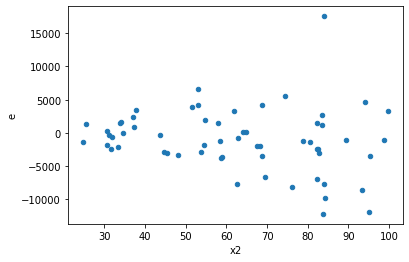

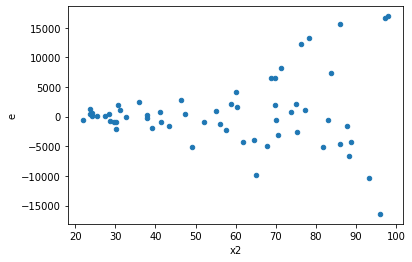

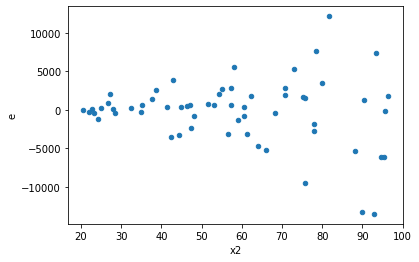

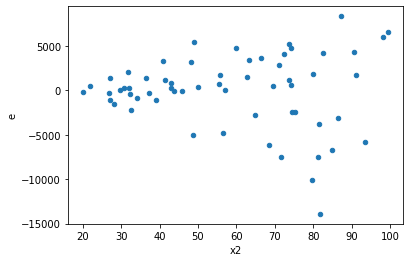

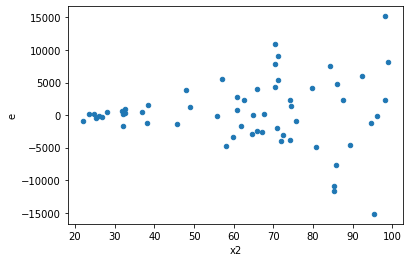

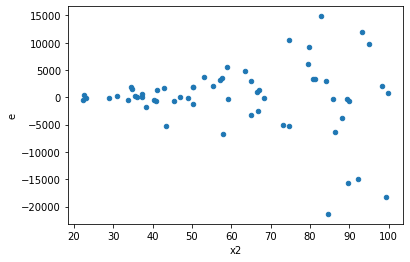

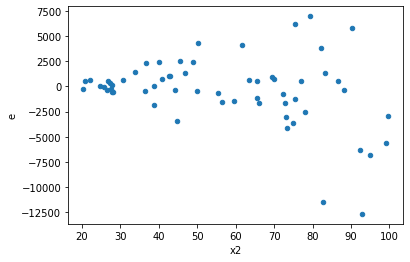

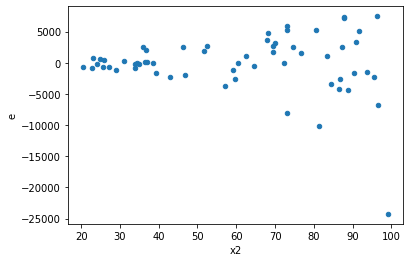

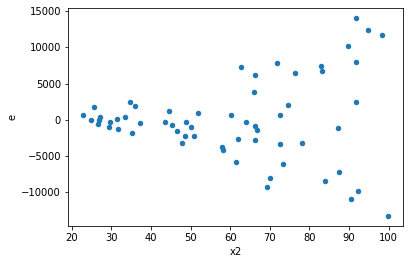

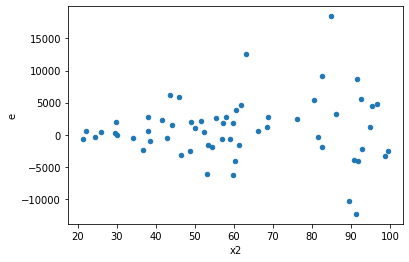

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,22.0,22.0,315543748.06282157,910742126.5221052,14342897.639219163,41397369.38736842,2.8862626247970713,0.016206778830042845,0.9918966105849786,0.008103389415021423,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,378102938.2822971,540604211.2638974,17186497.194649868,24572918.693813518,1.429780508238935,0.4083369691776997,0.7958315154111502,0.20416848458884984,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,380646728.45254195,1248142203.3039157,17302124.02057009,56733736.51381435,3.279004152690441,0.007375764872207036,0.9963121175638965,0.003687882436103518,Reject001=0 : Heteroscedasticity
9.0,22.0,22.0,314171910.5965998,852256594.067376,14280541.390754538,38738936.09397164,2.71270780525533,0.023268909431652496,0.9883655452841738,0.011634454715826248,Reject001=1 : Homoscedasticity
12.0,22.0,22.0,174547808.12605062,455801504.8482472,7933991.278456846,20718250.22037487,2.6113275769071116,0.02885419737464079,0.9855729013126796,0.014427098687320394,Reject001=1 : Homoscedasticity
17.0,22.0,22.0,272901778.75468844,832169443.8564062,12404626.307031292,37825883.81165483,3.0493368260690006,0.011626567106398866,0.9941867164468006,0.005813283553199433,Reject001=1 : Homoscedasticity
18.0,22.0,22.0,108639145.03974201,1373052575.0583863,4938142.95635191,62411480.68447211,12.63865409246456,1.1601932481397625e-07,0.9999999419903376,5.800966240698813e-08,Reject001=0 : Heteroscedasticity
20.0,22.0,22.0,302341039.4058818,664466175.6998767,13742774.518449174,30203007.98635803,2.197737287023926,0.07134247672532656,0.9643287616373367,0.03567123836266328,Reject001=1 : Homoscedasticity
28.0,22.0,22.0,333741903.27112365,675862652.9946438,15170086.512323802,30721029.681574717,2.0251057669722394,0.10527156926684134,0.9473642153665793,0.05263578463342067,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,548913586.2032009,422154071.83590126,24950617.554690953,19188821.44708642,0.769072004130765,0.5432098266531356,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,315543748.06282157,910742126.5221052,14342897.639219163,41397369.38736842,2.8862626247970713,0.016206778830042845,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,440498569.5181243,222877527.4909079,20022662.25082383,10130796.704132177,0.5059665181994141,0.11758514033054711,Reject001=1 : Homoscedasticity
3.0,22.0,22.0,582766422.1588944,164675416.6941241,26489382.82540429,7485246.213369277,0.2825753345295252,0.004485465444605481,Reject001=0 : Heteroscedasticity
4.0,22.0,22.0,378102938.2822971,540604211.2638974,17186497.194649868,24572918.693813518,1.429780508238935,0.4083369691776997,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,927119654.5162613,403273682.4006005,42141802.47801188,18330621.92730002,0.43497479579484766,0.05694467019186689,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,386885501.73092705,53320246.34200757,17585704.624133047,2423647.561000344,0.13781918966581225,1.799462887246365e-05,Reject001=0 : Heteroscedasticity
7.0,22.0,22.0,888799897.98527,57313005.72251216,40399995.36296682,2605136.623750553,0.0644835871971061,1.6078105669398618e-08,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,380646728.45254195,1248142203.3039157,17302124.02057009,56733736.51381435,3.279004152690441,0.007375764872207036,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    503
Reject001=1 : Homoscedasticity      497
Name: Result_test, dtype: int64